# Aula 5 - Machine Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

In [3]:
#importanto base de dados tratada e "mergeada" com dados de imoveis à venda em são paulo (kaggle) e o censo 2010 do IBGE
imoveis_sp = pd.read_csv("dados/dados_vendas_censo.csv")
imoveis_sp = imoveis_sp[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
imoveis_sp

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [4]:
imoveis_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_mm        5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

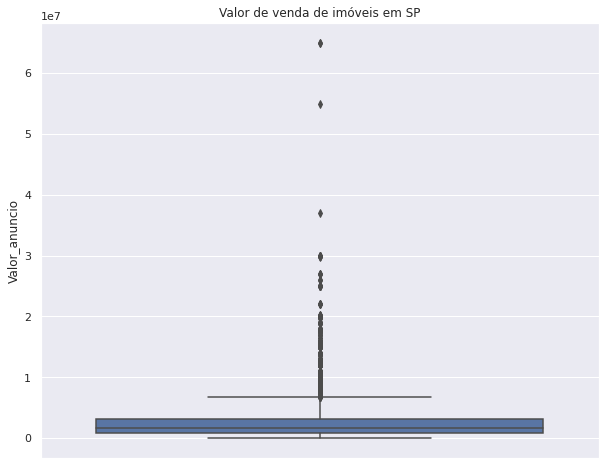

In [5]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=imoveis_sp, y="Valor_anuncio")
ax.set(title='Valor de venda de imóveis em SP')
plt.show()

In [6]:
outliers = imoveis_sp.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")
outliers

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


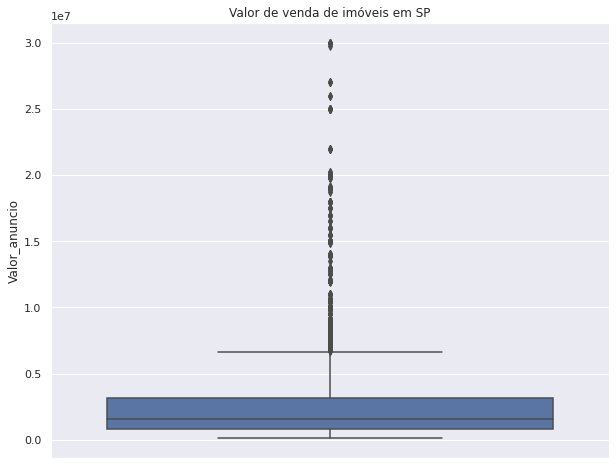

In [7]:
#Removendo outliers
imoveis_sp.drop(imoveis_sp.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = imoveis_sp, y="Valor_anuncio")
ax.set(title='Valor de venda de imóveis em SP')
plt.show()

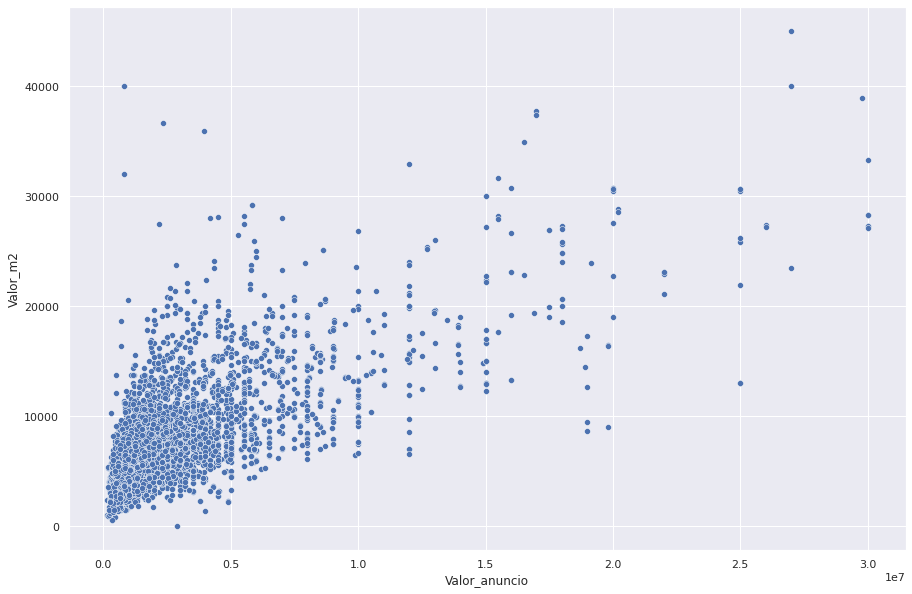

In [8]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=imoveis_sp, x="Valor_anuncio", y="Valor_m2")
plt.show()

In [9]:
imoveis_sp.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


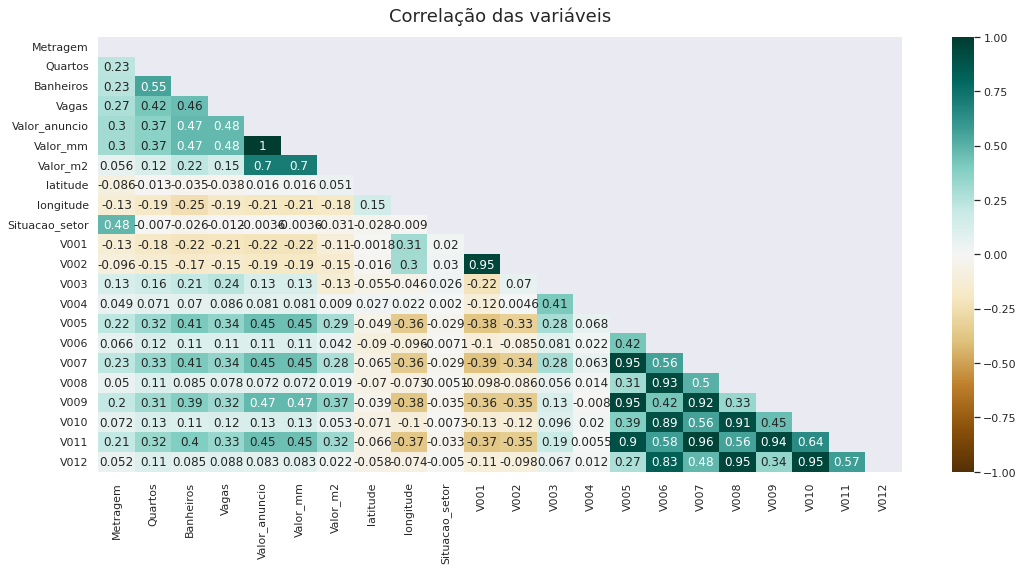

In [10]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(imoveis_sp.corr(), dtype=bool))
heatmap = sns.heatmap(imoveis_sp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação das variáveis', fontdict={'fontsize':18}, pad=16);

# Treinando o modelo

### 1) Regressão Linear (y = xb + a)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(imoveis_sp[['Metragem']], imoveis_sp['Valor_anuncio'])

LinearRegression()

In [14]:
# Para treinar o modelo, é preciso separar a base de dados em duas partes: uma ficará responsável pelo 
# treinamento em si, a outra será usada para testes do modelo em treinamento

In [15]:
from sklearn.model_selection import train_test_split

X = imoveis_sp[["Metragem"]]
Y = imoveis_sp["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_predict_test = lr.predict(X_test)
Y_predict_test
#array com a predição dos valores do imóvel

array([4535135.54576313, 2319529.74583429, 2424501.59358835, ...,
       2802400.24550293, 2483285.82833061, 2854186.3570616 ])

In [18]:
Y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

In [19]:
# Nota-se que somente a metragem não é suficiente para prever Y_test

In [20]:
Y_predict_train = lr.predict(X_train)
Y_predict_train

array([2382512.85448673, 2571462.18044402, 2689030.64992855, ...,
       2568662.93117058, 2655439.65864726, 2495882.4500611 ])

In [21]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [22]:
# CQD: De fato, somente a metragem é insuficiente para prever Y (Valor do imóvel)

### Métricas que ajudam a entender se o modelo treinado têm fit com a realidade

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# Quanto mais distante de zero, pior
mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [25]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.303454906

## Selecionando algumas variáveis, com base na correlação

##### (Modelo vencedor, com menor r2_train)

In [26]:
X = imoveis_sp[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]
Y = imoveis_sp["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [27]:
mae_test

1349590.3844325354

In [28]:
r2_test

0.37745069254620944

In [29]:
mae_train

1362945.691504761

In [30]:
r2_train

0.39899592785823323

<AxesSubplot:xlabel='Valor_anuncio'>

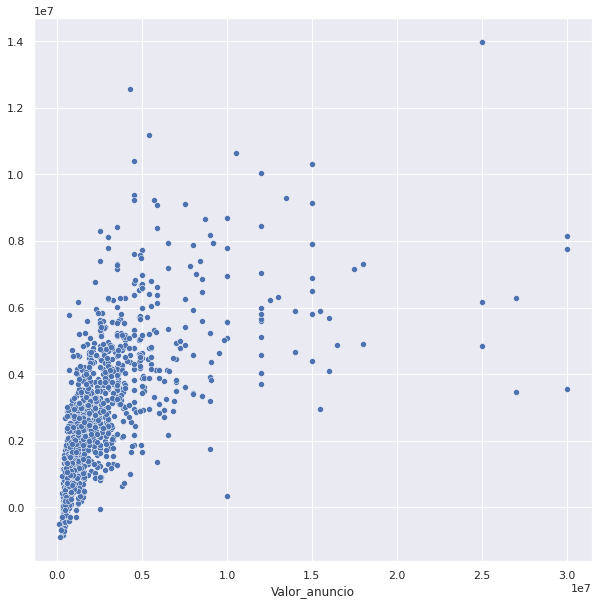

In [31]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)

### Selecionando mais variáveis para o modelo, para ver se melhora ou piora a predição

In [32]:
imoveis_sp.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude',
       'Situacao_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [33]:
X = imoveis_sp[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'latitude', 'longitude',
       'Situacao_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]
Y = imoveis_sp["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [34]:
mae_test

1333549.3332978

In [35]:
mae_train

1336869.5594283803

In [36]:
r2_test

0.40346952290642524

In [37]:
r2_train

0.42842167415101984

### Selecionando outras variáveis para o modelo, para ver se melhora ou piora a predição

In [38]:
X = imoveis_sp[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'latitude', 'longitude',
       'V001', 'V007', 'V009', 'V011']]
Y = imoveis_sp["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [39]:
mae_test

1349728.616015412

In [40]:
mae_train

1359232.622271818

In [41]:
r2_test

0.37890715177601264

In [42]:
r2_train

0.4020054107657477

##### Dicionário de dados do IBGE:

In [43]:
# V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
# V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
# V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1) 
# V004: Variância do número de moradores em domicílios particulares permanentes
# V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
# V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
# V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
# V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
# V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
# V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
# V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
# V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)